In [12]:
import numpy as np
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta  
        self.n_iter = n_iter 
        self.random_state = random_state  
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)  
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1]) 
        self.errors_ = []
        for _ in range(self.n_iter):  
            errors = 0
            for xi, target in zip(X, y):  
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi  # matrix can use += operation as a whole
                self.w_[0] += update  # w0 is the threshold, its parameter x0 is constant, no need to multiply
                errors += int(update != 0.0)  # add up error for each sample
            self.errors_.append(errors)
        return self
    def net_input(self, X):
        return np.dot(X, self.w_[1:] + self.w_[0])
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)  # if on the right of line, return 1. else return -1

In [13]:
import pandas as pd  
df_trainX = pd.read_csv("/home/jiarui/Documents/3314/COMP3314_a1/dataset_files/iris_X_train.csv", header=0, error_bad_lines=False)
df_trainy = pd.read_csv("/home/jiarui/Documents/3314/COMP3314_a1/dataset_files/iris_y_train.csv", header=0, error_bad_lines=False)
# df1
# df2

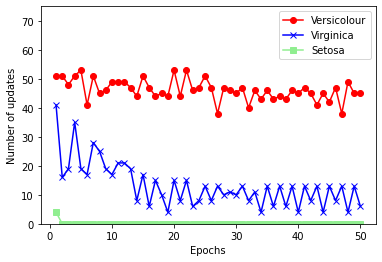

In [33]:
import matplotlib.pyplot as plt
import numpy as np
markers = ('o', 'x', 's', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
labels = ('Versicolour', 'Virginica', 'Setosa')
y_train = df_trainy.iloc[0:100, 0].values 
X_train = df_trainX.iloc[0:100].values

ppn = MultiPerceptron()
ppn.fit(X_train, y_train)

for class_ in ppn.classes:
    plt.plot(range(1, len(ppn.ppns[class_].errors_)+1), ppn.ppns[class_].errors_, marker=markers[class_], color=colors[class_], label=labels[class_])

plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.legend(loc='upper right')
plt.ylim(0, 75)
plt.show()
# y

In [54]:
df_testX = pd.read_csv("/home/jiarui/Documents/3314/COMP3314_a1/dataset_files/iris_X_test.csv", header=0, error_bad_lines=False)
df_testy = pd.read_csv("/home/jiarui/Documents/3314/COMP3314_a1/dataset_files/iris_y_test.csv", header=0, error_bad_lines=False)
X_test = df_testX.iloc[:].values
y_test = df_testy.iloc[:, 0].values

array([0, 2, 1, 0, 0, 2, 0, 1, 0, 0, 1, 2, 2, 2, 2, 0, 1, 0, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 1, 0, 0, 2,
       2, 0, 1, 1, 0, 1])

In [46]:
'''    输入：

        二分类训练算法L
        样本集合X
        标签集合y 使yi ∈ {1, … K} 是样本Xi的类标签

    输出：

        一个二分类分类器序列fk，k ∈ {1, …, K}

    执行过程：

        对于{1, …, K}中的每个元素k：
            构建一个新标签向量z，其中yi = k时zi = 1，否则 zi = 0（或-1）
            将L 应用于X、z 以获得fk

当进行多分类时，需要将所有的二分类分类器应用于一个未知样本x，x的最终分类类别即为产生最大置信度的分类器所对应的标签k：

    y ^ = arg ⁡ max k ∈ 1 … K f k ( x ) {\displaystyle {\hat {y}}=\arg \max _{k\in 1\ldots K}f_{k}(x)} '''

'    输入：\n\n        二分类训练算法L\n        样本集合X\n        标签集合y 使yi ∈ {1, … K} 是样本Xi的类标签\n\n    输出：\n\n        一个二分类分类器序列fk，k ∈ {1, …, K}\n\n    执行过程：\n\n        对于{1, …, K}中的每个元素k：\n            构建一个新标签向量z，其中yi = k时zi = 1，否则 zi = 0（或-1）\n            将L 应用于X、z 以获得fk\n\n当进行多分类时，需要将所有的二分类分类器应用于一个未知样本x，x的最终分类类别即为产生最大置信度的分类器所对应的标签k：\n\n    y ^ = arg \u2061 max k ∈ 1 … K f k ( x ) {\\displaystyle {\\hat {y}}=\x07rg \\max _{k\\in 1\\ldots K}f_{k}(x)} '

In [79]:
import numpy as np
class MultiPerceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta  
        self.n_iter = n_iter 
        self.random_state = random_state 
    def fit(self, X, y):
        self.classes = np.unique(y.tolist())
        self.ppns = []
        for class_ in self.classes:
            y_temp = np.where(y == class_, 1, -1)
            self.ppns.append(Perceptron(eta=self.eta, n_iter=self.n_iter))
            self.ppns[class_].fit(X, y_temp)
    def predict(self, X):
        f = []
        for ppn in self.ppns:
            f.append(ppn.net_input(X))
        print(f)
        # y_pred = f.index(max(f)).any()
        return self.classes[0]
    def get_ppns(self):
        return self.ppns

In [80]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.2):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x0_min, x0_max = X[:, 0].min()-1, X[:, 0].max()+1
    x1_min, x1_max = X[:, 1].min()-1, X[:, 1].max()+1
    x2_min, x2_max = X[:, 2].min()-1, X[:, 2].max()+1
    x3_min, x3_max = X[:, 3].min()-1, X[:, 3].max()+1
    xx0, xx1, xx2, xx3 = np.meshgrid(np.arange(x0_min, x0_max, resolution), np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution), np.arange(x3_min, x3_max, resolution))
    Z = classifier.predict(np.array([xx0.ravel(), xx1.ravel(), xx2.ravel(), xx3.ravel()]).T) 
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx0, xx1, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx0.min(), xx0.max())
    plt.ylim(xx1.min(), xx1.max())
    for idx, cl in enumerate(np.unique(y)): 
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', edgecolor='black', alpha=0.5, linewidth=1, marker='o', s=100, label='test set')

In [81]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
X_combined_std = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_std, y_combined, classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left', alpha=0.7)
plt.tight_layout()
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()